Decision Tree Algorithm can be used in both Classification and Regression Problem

In [1]:
import numpy as np                                                  

In [2]:
import pandas as pd

In [3]:
from pandas import Series,DataFrame

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
x = df[['Age','EstimatedSalary']].values

In [8]:
y = df['Purchased'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [11]:
xtrain = xtrain.astype(float)
xtest = xtest.astype(float)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()

In [14]:
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt = DecisionTreeClassifier(criterion = 'entropy')

In [17]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [18]:
ypred = dt.predict(xtest)

In [19]:
ypred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cm = confusion_matrix(ytest,ypred)

In [22]:
cm

array([[56,  7],
       [10, 27]], dtype=int64)

In [23]:
import seaborn as sns

<AxesSubplot:>

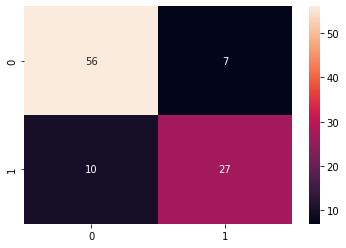

In [24]:
sns.heatmap(cm, annot = True)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
ac  = accuracy_score(ytest,ypred)

In [27]:
ac*100

83.0

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
classifier = RandomForestClassifier(n_estimators = 10,criterion = 'gini',random_state = 42)    #RFC(no. of DT, formula,rs)

In [31]:
classifier.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=10, random_state=42)

In [33]:
ypred = classifier.predict(xtest)

In [34]:
ypred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm = confusion_matrix(ytest,ypred)

In [38]:
cm

array([[58,  5],
       [ 8, 29]], dtype=int64)

In [39]:
import seaborn as sns

<AxesSubplot:>

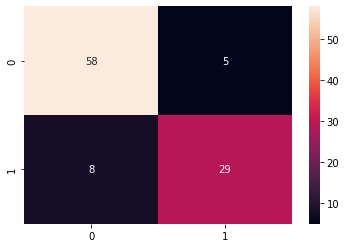

In [40]:
sns.heatmap(cm,annot =True)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
ac = accuracy_score(ytest,ypred)

In [43]:
ac*100

87.0

In [44]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        63
           1       0.85      0.78      0.82        37

    accuracy                           0.87       100
   macro avg       0.87      0.85      0.86       100
weighted avg       0.87      0.87      0.87       100

